<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #2c2c2c; font-size:115%; text-align:left">

<h3 align="left"><font color='orange'>Table of Contents:</font></h3>

* [Step 1 | Import Libraries](#import)
* [Step 2 | Loading the Dataset](#load)
* [Step 3 | EDA](#explore)
    - [Step 3.1 | Dataset basic Information](#basic)
    - [Step 3.2 | Missing Values](#missing)
    - [Step 3.3 | Duplicated Values](#duplicated)
    - [Step 3.4 | Univariate Analysis](#univariate)
    - [Step 3.5 | Bivariate Analysis](#bivariate)
    - [Step 3.6 | Multivariate Analysis](#multivariate)
* [Step 4 | Data Preprocessing](#preprocessing)
    - [Step 4.1 | Features Encoding](#encoding)
    - [Step 4.2 | Missing Value Handling](#imputation)
    - [Step 4.3 | Data Transformation](#transform)
    - [Step 4.4 | Data Reduction](#reduce)
    - [Step 4.5 | Outlier Treatment](#outlier)
    - [Step 4.5 | Insights and Recommendations](#insight)

<a id="import"></a>
# Importing Libraries
⬆️ [Tabel of Contents](#contents_tabel)


In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
import os
import warnings


In [259]:
#suppress all warning
warnings.filterwarnings("ignore")

<a id='load'></a>
# Loading Data Set
⬆️ [Tabel of Contents](#contents_tabel)

In [260]:
#using locally stored dataset
df=pd.read_csv('data/RTA Dataset.csv')

In [261]:
#load the data from the github repo
# df=pd.read_csv('https://raw.githubusercontent.com/Teshager21/accident-analysis-addis_ababa/refs/heads/main/data/RTA%20Dataset.csv')

In [262]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


<a id='explore'></a>
# Exploratory Data Analysis
⬆️ [Tabel of Contents](#contents_tabel)

<a id='basic'></a>
### <i>Dataset Basic Information</i>
⬆️ [Tabel of Contents](#contents_tabel)

In [263]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle,Changing lane to the right,Slight Injury


In [264]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [265]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
983,19:00:00,Thursday,18-30,Male,Junior high school,Employee,Below 1yr,Automobile,Owner,NaN,...,Moving Backward,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
862,7:30:00,Wednesday,Over 51,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,2-5yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
1701,15:40:00,Sunday,31-50,Male,Junior high school,Owner,1-2yr,Automobile,Owner,1-2yr,...,Other,na,na,na,na,NaN,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury
5834,17:25:00,Tuesday,Over 51,Male,Elementary school,Employee,1-2yr,Lorry (11?40Q),Owner,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
268,16:20:00,Monday,18-30,Unknown,Junior high school,Employee,Below 1yr,Stationwagen,Owner,Unknown,...,Going straight,Pedestrian,Male,31-50,3,Self-employed,Normal,Not a Pedestrian,No distancing,Slight Injury
5269,22:02:00,Saturday,18-30,Male,High school,Employee,2-5yr,NaN,Owner,NaN,...,Going straight,Driver or rider,Male,5,3,Other,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4539,20:35:00,Monday,31-50,Male,Junior high school,Owner,5-10yr,Lorry (41?100Q),Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
11288,0:25:00,Sunday,18-30,Male,Elementary school,Owner,5-10yr,Public (> 45 seats),Owner,1-2yr,...,Moving Backward,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
6890,20:11:00,Friday,31-50,Male,Junior high school,Owner,NaN,Lorry (41?100Q),Owner,Unknown,...,Going straight,Passenger,Female,Under 18,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
11447,13:57:00,Wednesday,18-30,Male,Elementary school,Employee,5-10yr,Other,Owner,1-2yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury


In [266]:
df.shape

(12316, 32)

In [267]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

#### Rename Columns- use small letters for column names

In [268]:
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}

In [269]:
df.rename(columns=col_map,inplace=True)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

In [271]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [272]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
time,12316,1074,15:30:00,120
day_of_week,12316,7,Friday,2041
driver_age,12316,5,18-30,4271
driver_sex,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
vehicle_type,11366,17,Automobile,3205
vehicle_owner,11834,4,Owner,10459
service_year,8388,6,Unknown,2883


<a id='missing'></a>
<b>Missing Values</b>
⬆️ [Tabel of Contents](#contents_tabel)

In [273]:
#number of missing values in each column & Missing values in percentage
missing_percentages=df.isnull().sum().sort_values(ascending=False)*100/len(df)
missing_percentages[missing_percentages>0]
missing_values=pd.DataFrame(df.isna().sum().sort_values(ascending=False)[df.isna().sum()>0],columns=['#missing_values'])
print(missing_values.shape)
missing_values['percentage']=missing_percentages[missing_percentages>0].apply(lambda x: f"{x:.2f}%")
missing_values


(16, 1)


,#missing_values,percentage
vehicle_defect,4427,35.95%
service_year,3928,31.89%
casualty_work,3198,25.97%
casualty_fitness,2635,21.39%
vehicle_type,950,7.71%
junction_type,887,7.20%
driving_experience,829,6.73%
educational_level,741,6.02%
vehicle_driver_relation,579,4.70%
vehicle_owner,482,3.91%


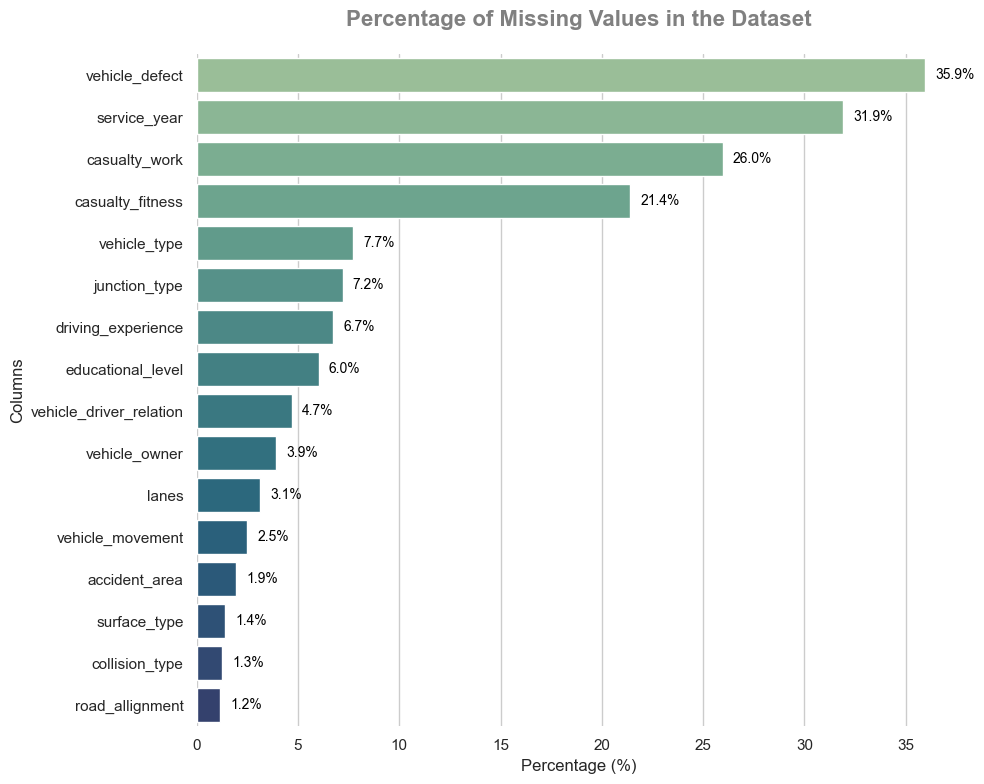

In [274]:
missing_data = missing_percentages[missing_percentages > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    y=missing_data.index,
    x=missing_data.values,
    palette="crest"
)

# Add title and labels
plt.title("Percentage of Missing Values in the Dataset", fontsize=16, fontweight="bold", color="gray", pad=20)
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Columns", fontsize=12)

# Add percentage annotations on bars
for index, value in enumerate(missing_data.values):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', ha='left', fontsize=10, color="black")

# Remove legend (not needed)
plt.legend([], [], frameon=False)

# Improve layout and aesthetics
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [275]:
#missing values in numerical data
numerical_columns=df.select_dtypes(exclude='object')
numerical_columns.isna().sum()

vehicles_involved    0
casualties           0
dtype: int64

<b>Missingness</b>

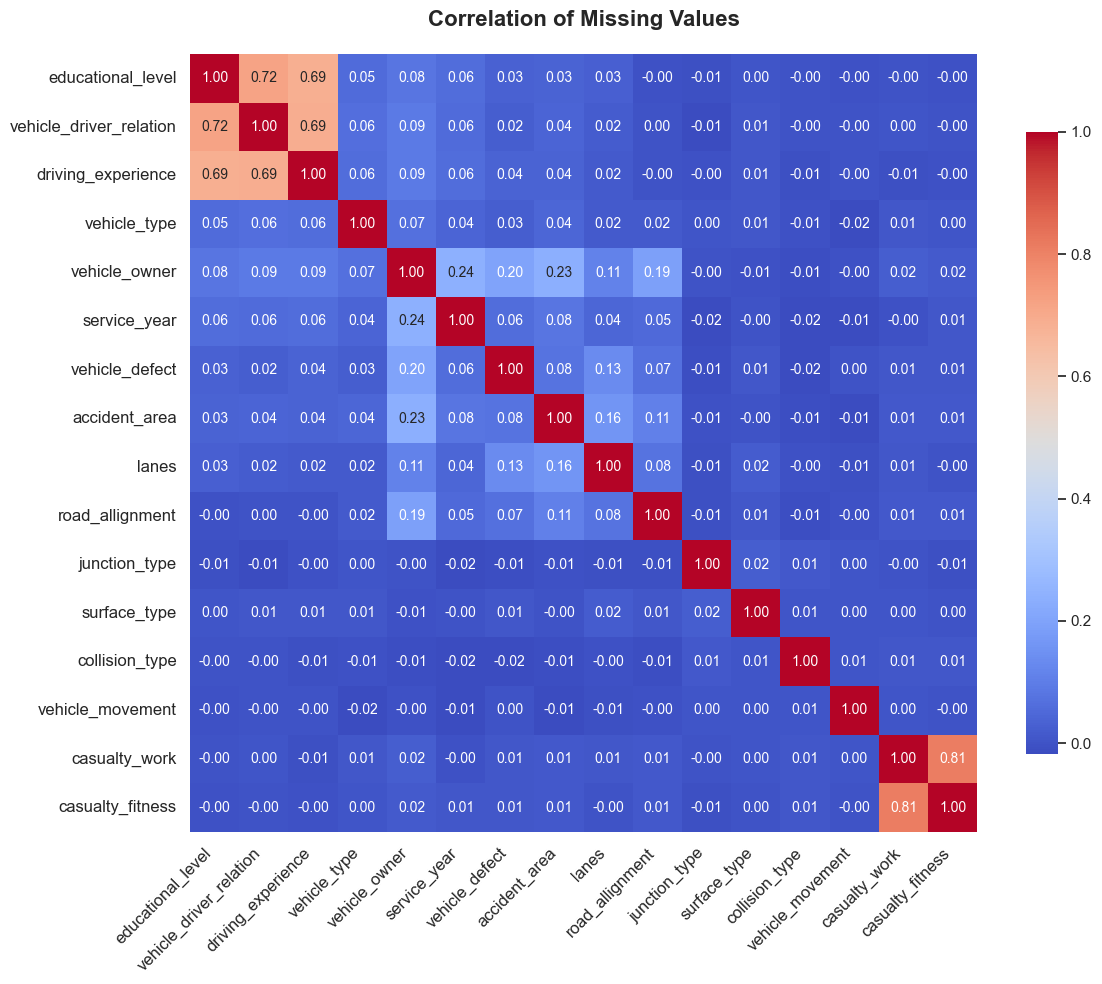

In [276]:
#check if data is missing completely at ramdom(MCAR), at random(MAR) or not at random(MNAR)
missingness = df.isnull().astype(int)
missingness = missingness.loc[:, (missingness.sum(axis=0) > 0)]
correlation_matrix = missingness.corr()

# Increase plot size and apply Seaborn theme
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")

# Create heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    annot_kws={"size": 10},
    cbar_kws={"shrink": 0.8}
)

# Add title and adjust axis labels
plt.title("Correlation of Missing Values", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

<a id='duplicated'></a>
<b>Duplicated Values</b>
⬆️ [Tabel of Contents](#contents_tabel)

In [277]:
print(df.duplicated().sum())

0


<b>#Unique Values per Columns</b>

In [278]:
df.nunique().sort_values(ascending=False)

time                       1074
accident_cause               20
vehicle_type                 17
accident_area                14
vehicle_movement             13
collision_type               10
weather_condition             9
road_allignment               9
pedestrian_movement           9
junction_type                 8
casualties                    8
casualty_work                 7
lanes                         7
driving_experience            7
educational_level             7
day_of_week                   7
casualty_age                  6
vehicles_involved             6
service_year                  6
casualty_fitness              5
surface_type                  5
driver_age                    5
vehicle_driver_relation       4
vehicle_owner                 4
casualty_class                4
casualty_severity             4
light_condition               4
road_surface_conditions       4
vehicle_defect                3
driver_sex                    3
casualty_sex                  3
accident

<b>Distinct Values</b>

In [279]:
uniques=[]
for i in df.columns:
     uniques.append(df[i].unique())
uniques_df=pd.Series(data=uniques,index=df.columns,name='Values')
pd.set_option('display.max_colwidth', None) 
styled_df = uniques_df.to_frame().style.set_properties(**{'text-align': 'left'})
styled_df

,Values
time,['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
day_of_week,['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
driver_age,['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
driver_sex,['Male' 'Female' 'Unknown']
educational_level,['Above high school' 'Junior high school' nan 'Elementary school' 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
vehicle_driver_relation,['Employee' 'Unknown' 'Owner' nan 'Other']
driving_experience,['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr' 'unknown']
vehicle_type,['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)' 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj' 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
vehicle_owner,['Owner' 'Governmental' nan 'Organization' 'Other']
service_year,['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'Below 1yr']


<a id='univariate'></a>
### <i>Univariate Analysis</i>
⬆️ [Tabel of Contents](#contents_tabel)

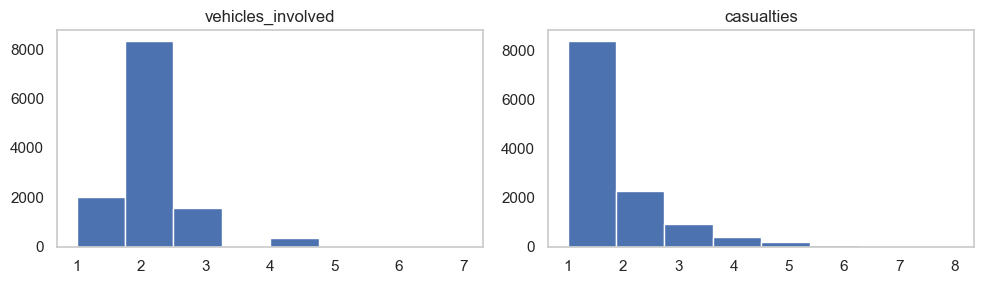

In [280]:
#distribution of numerical columns
axes=df.hist(grid=False, figsize=(10, 3),bins=8)
for ax in axes.flatten():
    # ax.set_title(f'Histogram of {ax.get_xlabel()}')
    ax.set_xlabel(ax.get_xlabel())
    # ax.set_ylabel('Frequency')
plt.tight_layout()


<b>Skewness</b>

In [281]:
count_value= df['accident_severity'].value_counts()
proportions = count_value / count_value.sum()
print(round(proportions,2))


accident_severity
Slight Injury     0.85
Serious Injury    0.14
Fatal injury      0.01
Name: count, dtype: float64


In [282]:
cv = np.std(proportions) / np.mean(proportions)
print(f"Coefficient of Variation: {cv}")

Coefficient of Variation: 1.09815368128082


<Axes: title={'center': 'Category Proportions'}, xlabel='accident_severity'>

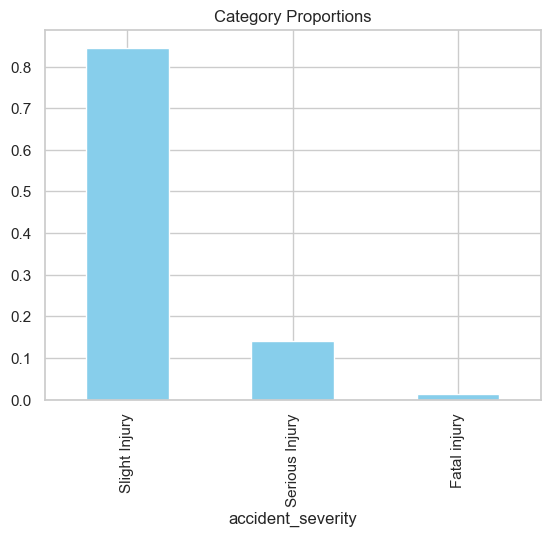

In [283]:
proportions.plot(kind='bar', color='skyblue', title='Category Proportions')

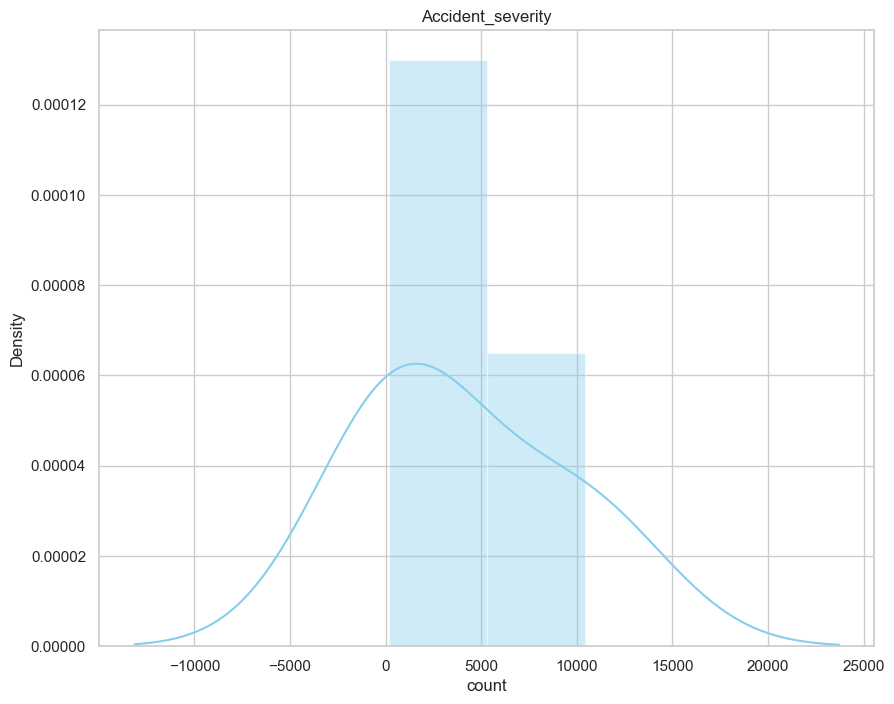

In [284]:
plt.figure(figsize= (10,8))
sns.distplot(count_value,color="skyblue")
plt.title("Accident_severity")
plt.show()

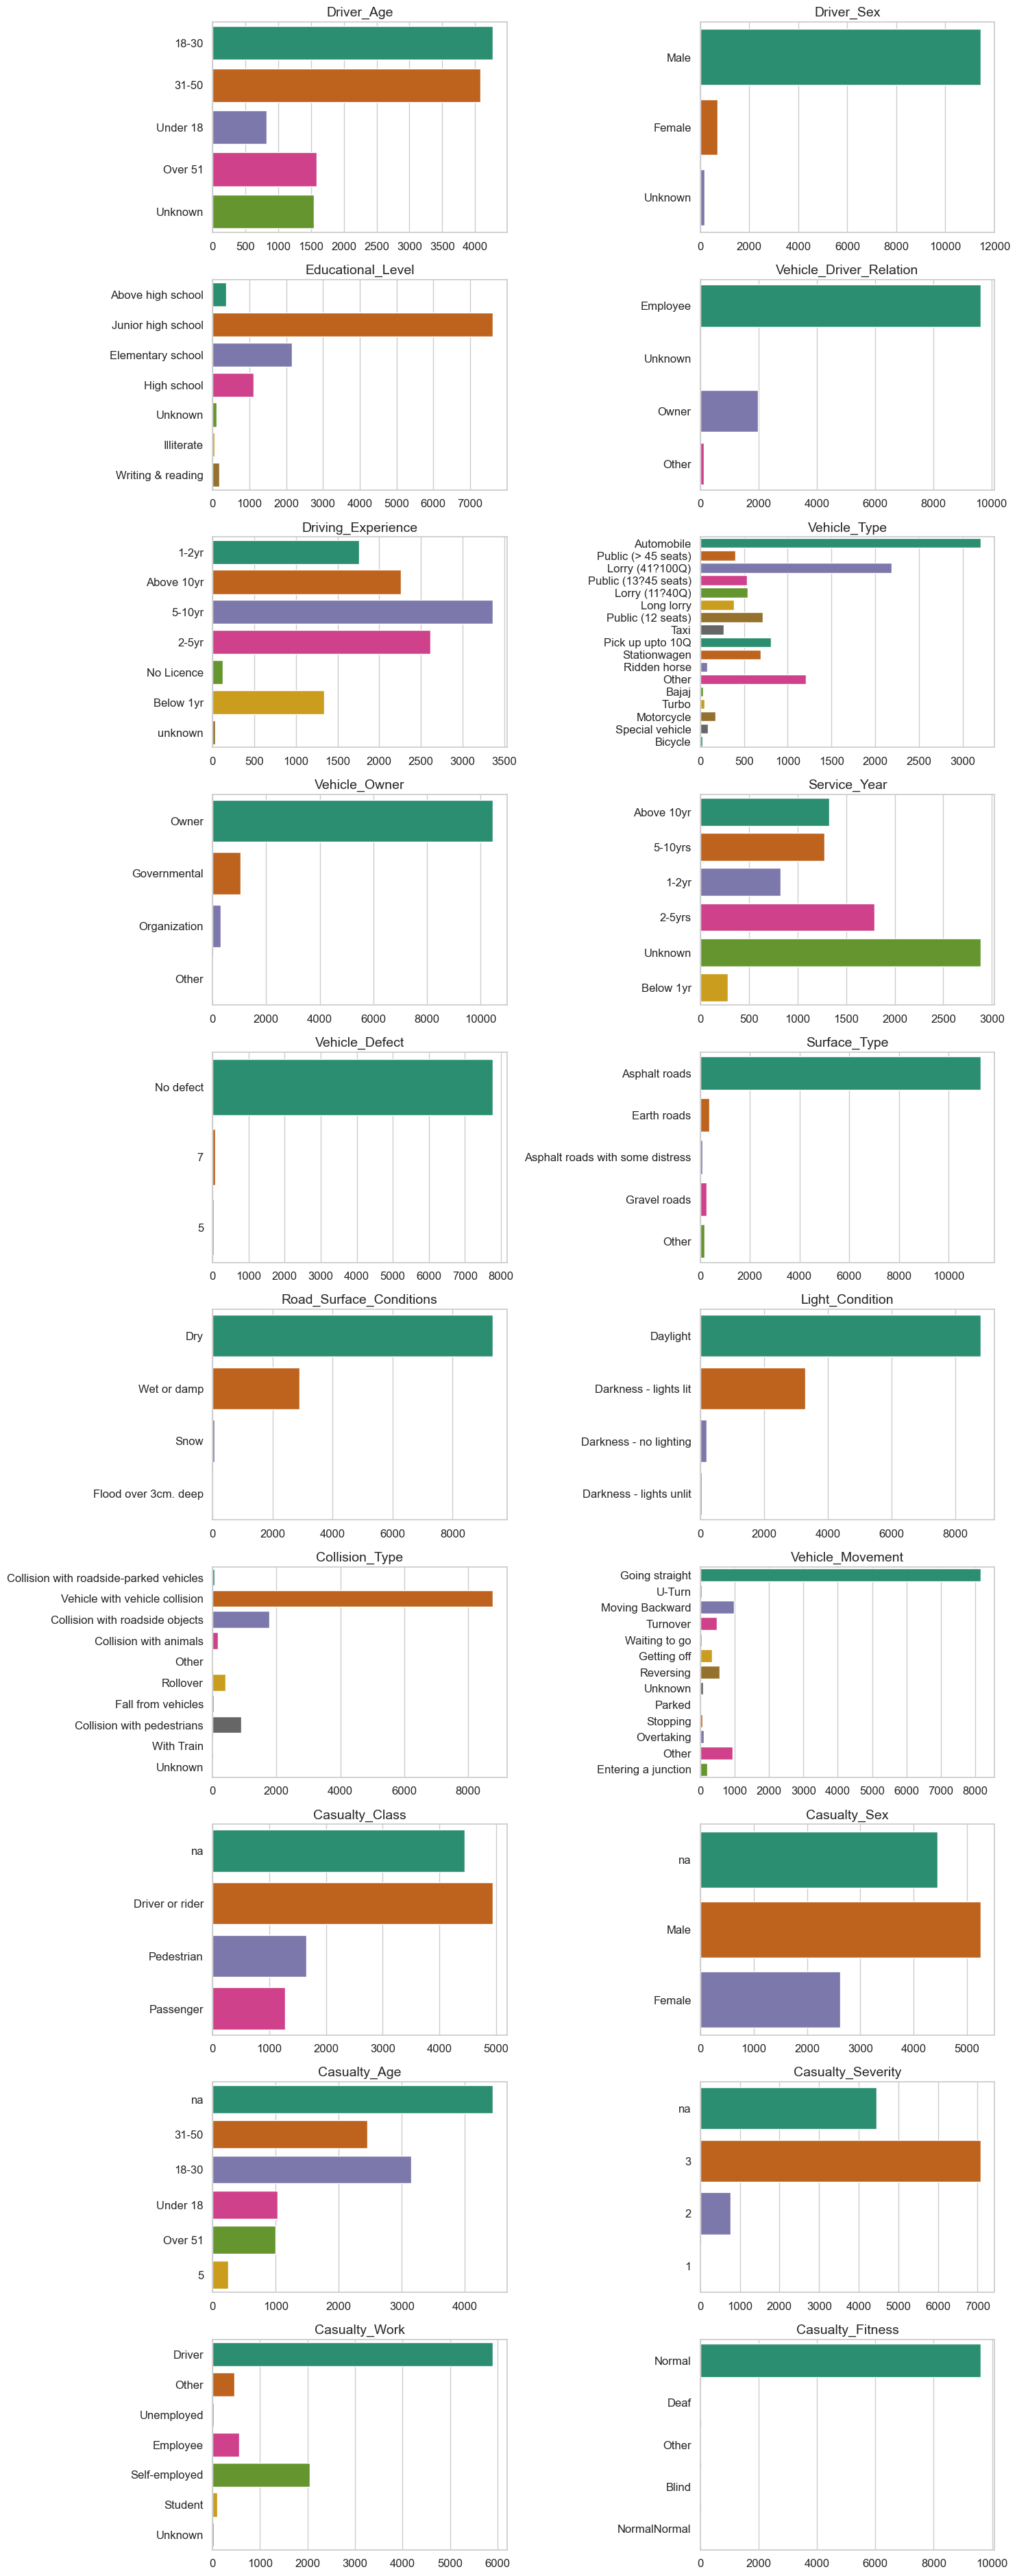

In [285]:
plt.figure(figsize=(15,60))
plotnumber = 1

for col in df.drop(['time', 'lanes', 'road_allignment','junction_type','weather_condition' ,'pedestrian_movement','day_of_week','accident_severity','accident_area','casualties','vehicles_involved','accident_cause'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

#### <i>Accident distribution through out the week days<i>

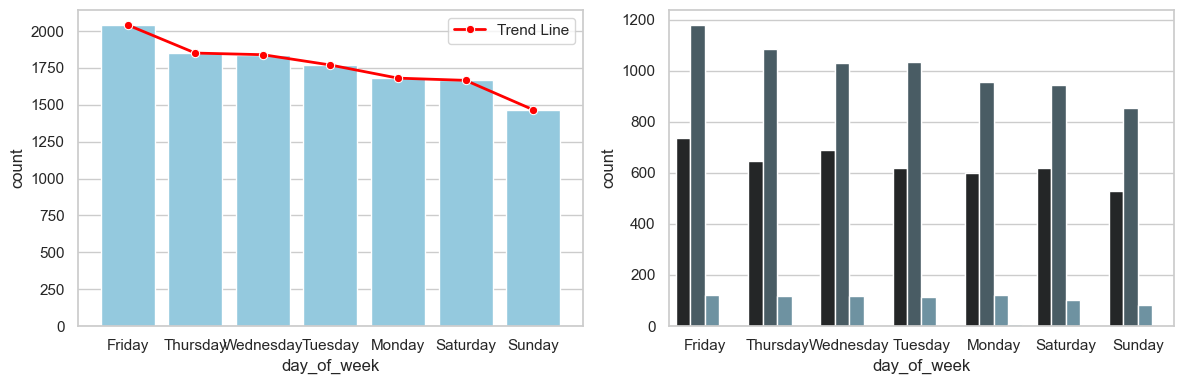

In [286]:
# Calculate value counts for accidents per day and sort them in descending order
day_counts = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sorted_order = day_counts.sort_values(ascending=False).index # Sort the days based on accident count (descending order)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(data=df, x='day_of_week', ax=axes[0], order=sorted_order, color='skyblue') # Countplot ordered by accident frequency
sns.lineplot(x=sorted_order, y=day_counts[sorted_order], color='red', marker='o', label='Trend Line', linewidth=2, ax=axes[0]) # Add trend line (optional)
sns.countplot(x='day_of_week', hue='casualty_severity', data=df, order=sorted_order, ax=axes[1], palette="viridis", legend=False) # Second countplot with hue
sns.countplot(x=df['day_of_week'],hue=df['casualty_severity'],order=sorted_order,legend=False,ax=axes[1],color='skyblue') #show the breakdown by accident severity
plt.tight_layout() # Tight layout
plt.show()


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* Friday is the most accident prone day of all the other days for all categories of accident severity
* The accident decreases from Friday to Thursday  then Wednesday right up to Sunday in an orderly fashion
    
</div>

#### <i>Accident distribution by hour<i>

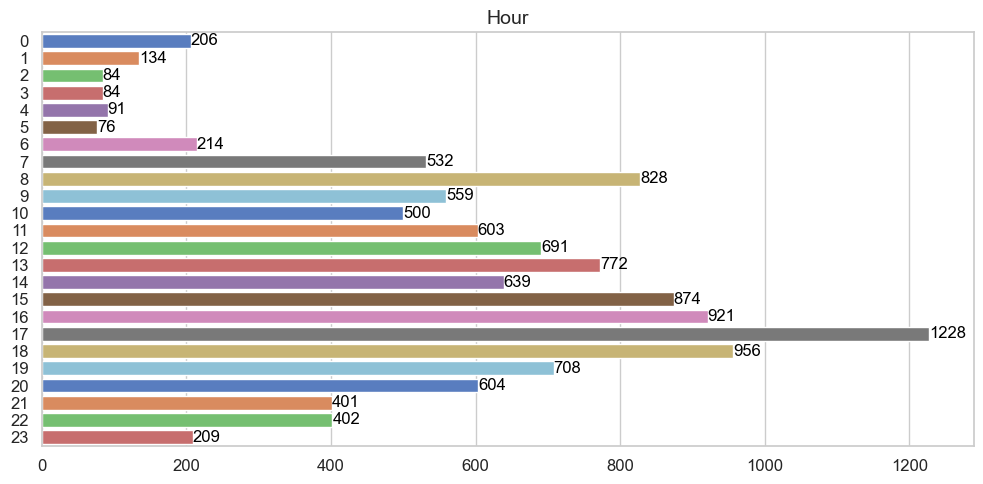

In [287]:
plt.figure(figsize=(10,5))
# hour_counts=pd.to_datetime(df['time'],format='%H:%M:%S').dt.hour.value_counts().sort_values(ascending=False).head(8)
# order=hour_counts.index
df['hour']=pd.to_datetime(df['time'],format='%H:%M:%S').dt.hour
ax=sns.countplot( data=df,y='hour',palette='muted')
# Adding annotations
for p in ax.patches:
    width = p.get_width()  # Get the width of each bar
    ax.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{int(width)}', 
            va='center', ha='left', fontsize=12, color='black')  # Display count
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
df.drop('hour', axis=1, inplace=True) # Remove the 'hour' column after plotting
plt.tight_layout()


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#fAf9f6;background-color:#2c2c2c;">
<h3 align="left"><font color=#fAf9f6>💡 Observations:</font></h3>

Most accidents happen around three critical peak hours:
* 8:00  - > Typical start  of work hour for offices,industries
* 13:00  - > Typical lunch hour
* 17:00 - > Typical Exit from work hour

Least accidents happen during the night period:
* From 23:00-5:00
    
</div>

#### Accident Area

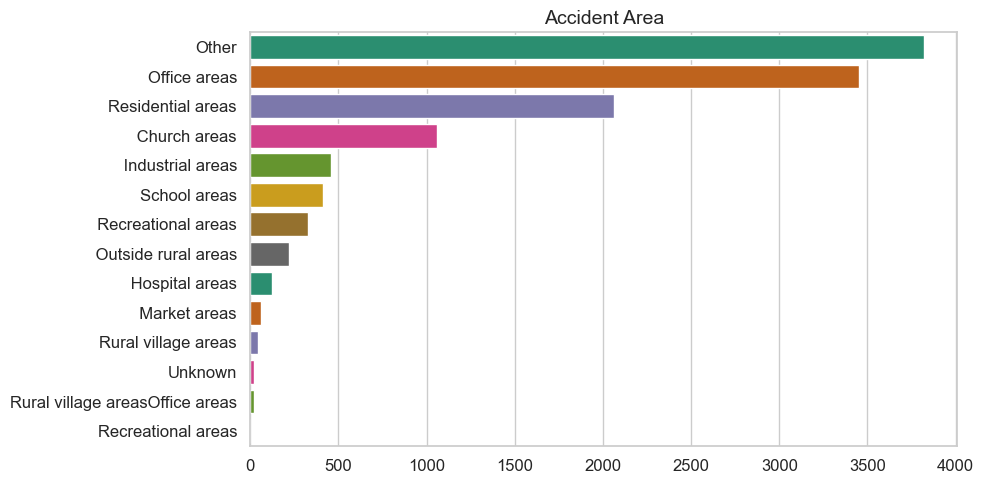

In [288]:
plt.figure(figsize=(10,5))
order=df['accident_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, y='accident_area', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Accident Area', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

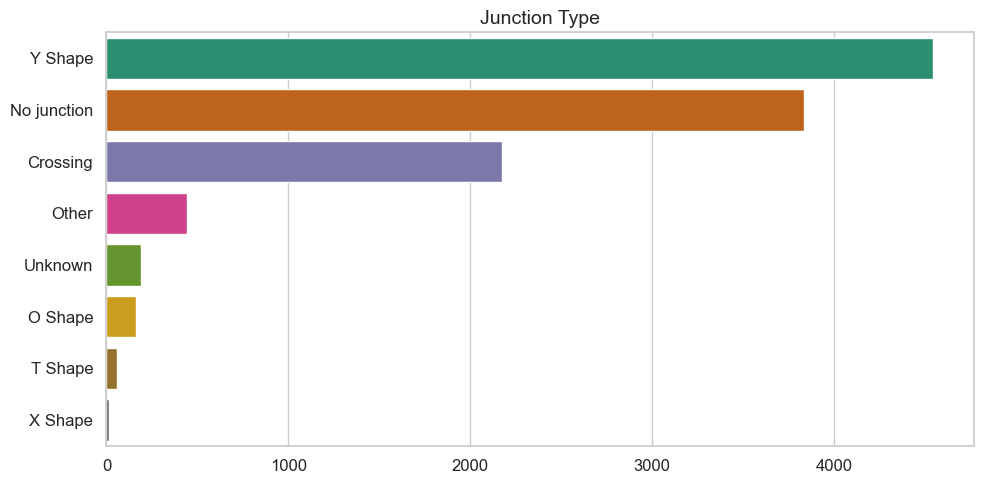

In [289]:
plt.figure(figsize=(10,5))
order=df['junction_type'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, y='junction_type', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Junction Type', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

#### <i>Accident distribution through out the weekends<i>

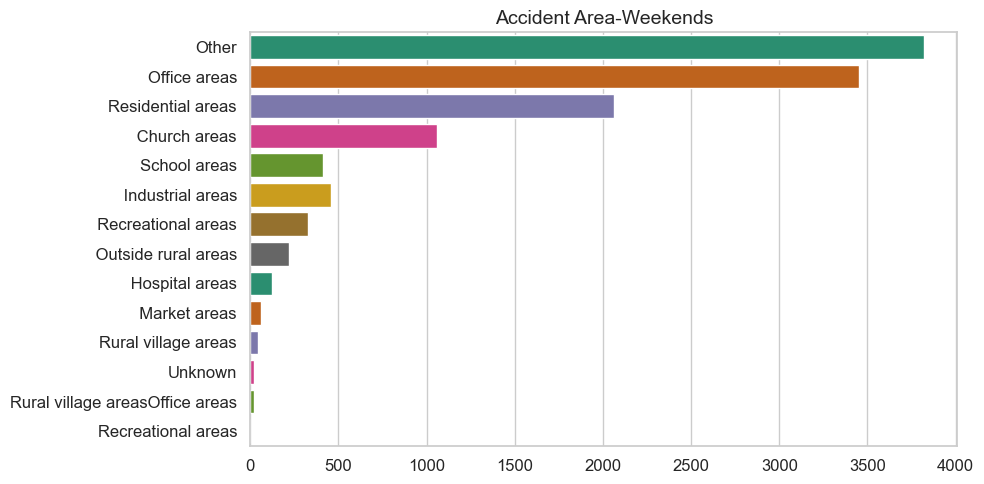

In [290]:
plt.figure(figsize=(10,5))

order=df['accident_area'].where(df['day_of_week'].isin(["Saturday","Sunday"])).value_counts().sort_values(ascending=False).index
sns.countplot(data=df, y='accident_area', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Accident Area-Weekends', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

#### <i>Accidents vs Weather Conditions<i>

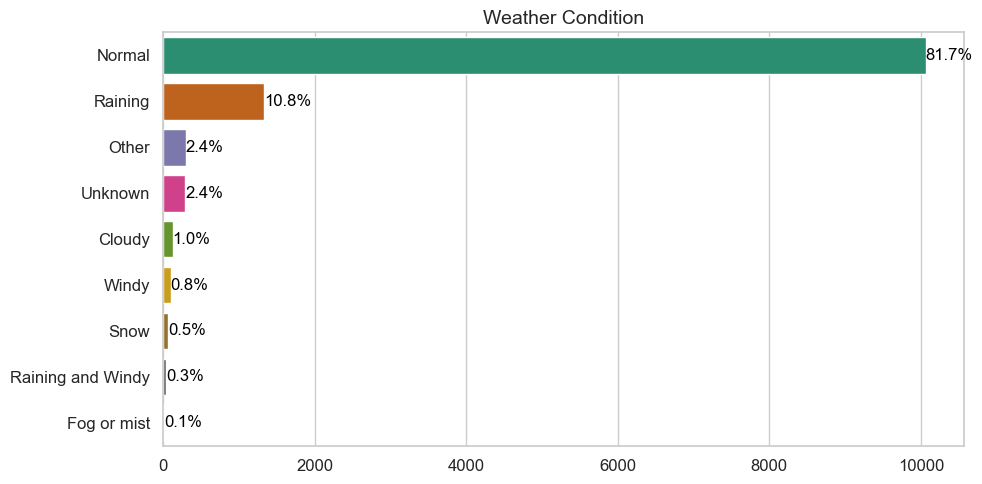

In [291]:
#Weather condition
plt.figure(figsize=(10,5))
order=df['weather_condition'].value_counts().sort_values(ascending=False).index
ax=sns.countplot(data=df, y='weather_condition', palette = 'Dark2',order=order)
# Total number of entries
total = len(df)

# Add percentage annotations
for p in ax.patches:
    width = p.get_width()  # Count of each category
    percentage = (width / total) * 100  # Calculate percentage
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=12, color='black')


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Weather Condition', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

#### <i>Accident per Lanes<i>

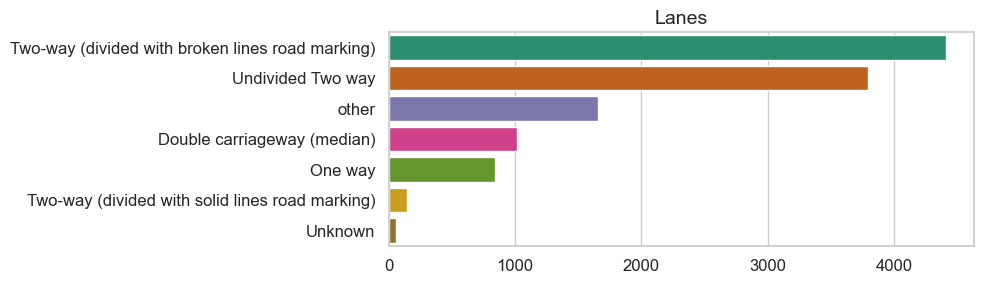

In [292]:
plt.figure(figsize=(10,3))
order=df['lanes'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, y='lanes', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

Lanes where most accidents occur:
* Two-way(divided with broken lines road marking)
* Undivided Two ways 
    
</div>

#### <i>Gender Constitution of Accidents<i>

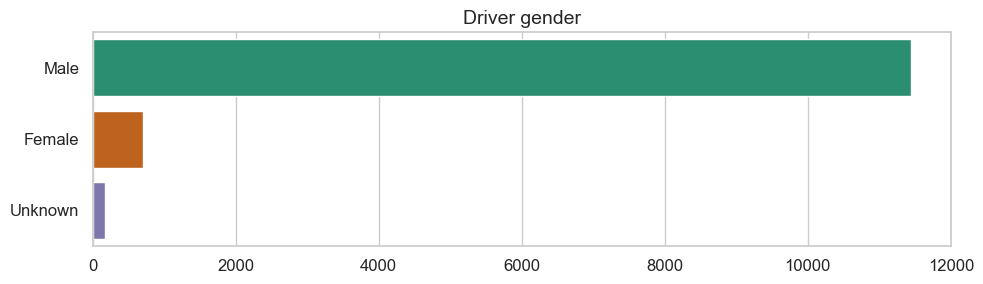

In [293]:
plt.figure(figsize=(10,3))
order=df['driver_sex'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, y='driver_sex', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Driver gender', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939 background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* Depending on the prior probability of a female driver, this may show that Men are overwhelmingly prone to accident than women
    
</div>

<a id='bivariate'></a>
### <i>Bivariate Analysis</i>
⬆️ [Tabel of Contents](#contents_tabel)

In [294]:
cross_tab= pd.crosstab(index=df['accident_cause'], columns=df['accident_severity'], margins=True)
pd.crosstab(index=df['accident_cause'], columns=df['accident_severity'], margins=True)
cross_tab

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
accident_cause,,,,
Changing lane to the left,16,206,1251,1473
Changing lane to the right,23,260,1525,1808
Driving at high speed,2,31,141,174
Driving carelessly,22,209,1171,1402
Driving to the left,4,53,227,284
Driving under the influence of drugs,5,46,289,340
Drunk driving,0,3,24,27
Getting off the vehicle improperly,3,29,165,197
Improper parking,1,2,22,25


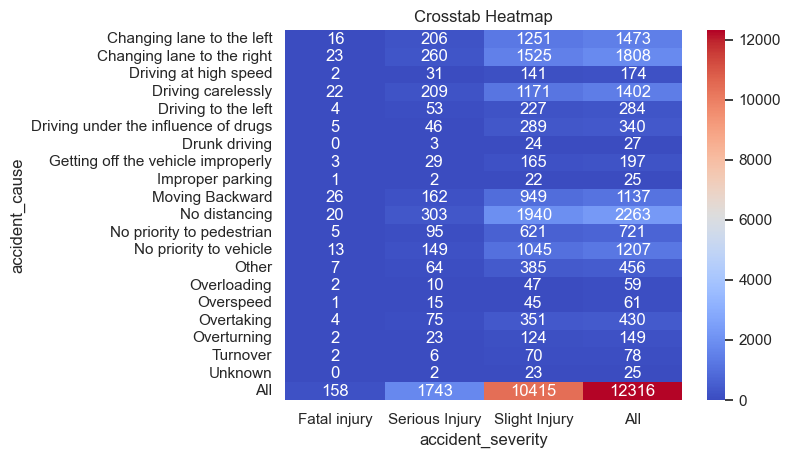

In [295]:
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt=".0f")
plt.title('Crosstab Heatmap')
plt.show()

In [296]:
cross_tab.index

Index(['Changing lane to the left', 'Changing lane to the right',
       'Driving at high speed', 'Driving carelessly', 'Driving to the left',
       'Driving under the influence of drugs', 'Drunk driving',
       'Getting off the vehicle improperly', 'Improper parking',
       'Moving Backward', 'No distancing', 'No priority to pedestrian',
       'No priority to vehicle', 'Other', 'Overloading', 'Overspeed',
       'Overtaking', 'Overturning', 'Turnover', 'Unknown', 'All'],
      dtype='object', name='accident_cause')

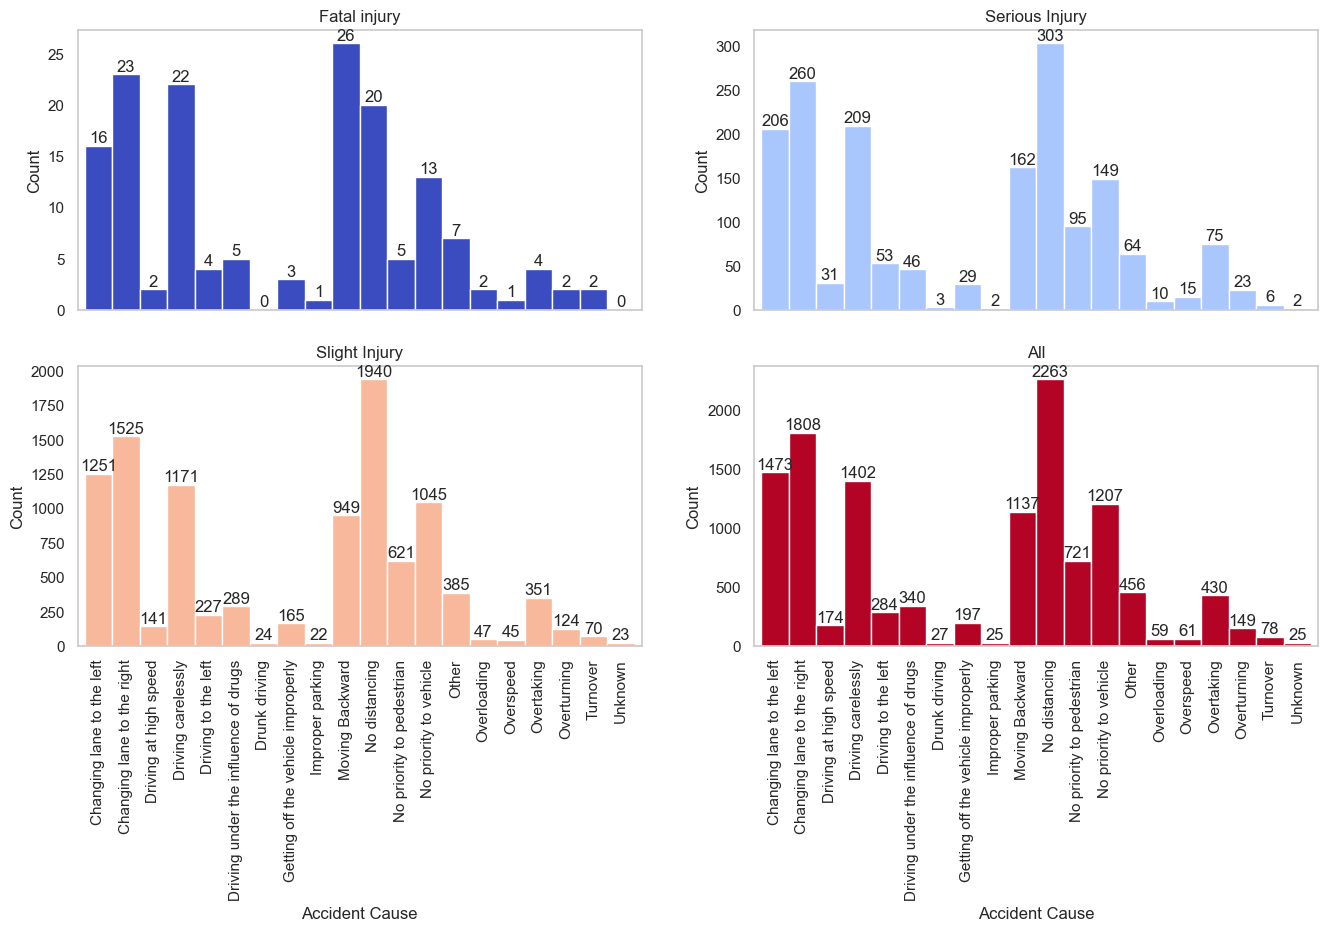

In [ ]:
#plot cross tab
cross_tab=cross_tab[cross_tab.index!='All']
num_columns = len(cross_tab.columns)
rows = 2  # Number of rows
cols = (num_columns + 1) // rows  # Calculate number of columns per row

# Create subplots
axes=cross_tab.plot(
    kind='bar',
    subplots=True,
    layout=(rows, cols),
    figsize=(16, 8),
    legend=False,
    colormap='coolwarm',
    width=1,
    grid=False
)
# Annotate each bar with its value
for ax in axes.flatten():  # Flatten the axes array to iterate over it
    for container in ax.containers:  # Iterate over bar containers
        ax.bar_label(container, fmt='%.0f')  # Add integer labels to each bar

# Add titles and labels for each subplot
for i, ax in enumerate(plt.gcf().axes):
    if i < num_columns:  # Avoid extra subplots from the grid
        ax.set_title(cross_tab.columns[i])
        ax.set_ylabel('Count')
        ax.set_xlabel('Accident Cause')



<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

Accident Causes:
* Changing Lanes is the most prominent cause of accidents (merging changing Lanes to the right and to the left)
* No distancing is  the second most prominent cause of accidents followed by driving carelessly and no priority to vehicles
* Improper parking,<u>Drunk driving</u>, Overloading and <u>Overspeeding</u> are the least prominent causes of Accident
    
</div>

### <i>Multivariate Analysis</i>

<a id='preprocessing'></a>
# Preprocessing
⬆️ [Tabel of Contents](#contents_tabel)

### <i>Data Cleaning</i>

In [298]:
#copy data before any manipulation
df2=df.copy(deep=True)

<b>Converting values to numbers</b>

In [299]:
#time
df2['time']=pd.to_datetime(df2['time'],format='%H:%M:%S')
df2['hour']=df2['time'].dt.hour
df2['minute']=df2['time'].dt.minute
df2[['time','hour','minute']].head()

#convert objects to numbers
df2['casualty_severity']=pd.to_numeric(df2['casualty_severity'],errors='coerce')

#drop the time feature
df2.drop(columns=['time'],inplace=True)
df2.dtypes

day_of_week                 object
driver_age                  object
driver_sex                  object
educational_level           object
vehicle_driver_relation     object
driving_experience          object
vehicle_type                object
vehicle_owner               object
service_year                object
vehicle_defect              object
accident_area               object
lanes                       object
road_allignment             object
junction_type               object
surface_type                object
road_surface_conditions     object
light_condition             object
weather_condition           object
collision_type              object
vehicles_involved            int64
casualties                   int64
vehicle_movement            object
casualty_class              object
casualty_sex                object
casualty_age                object
casualty_severity          float64
casualty_work               object
casualty_fitness            object
pedestrian_movement 

In [300]:
#replace unknown, Unknown and na with np.nan
df2.replace(['na','unknown','Unknown'], np.nan, inplace=True)
for col in df2:
    print(df2[col].unique())

['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
['18-30' '31-50' 'Under 18' 'Over 51' nan]
['Male' 'Female' nan]
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
['Employee' nan 'Owner' 'Other']
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr']
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
['Owner' 'Governmental' nan 'Organization' 'Other']
['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Below 1yr']
['No defect' nan '7' '5']
['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' nan 'Other' ' Church areas' '  Market areas'
 'Rural village areas' ' Outside rural areas' ' Hospital areas'
 'School areas' 'Rural village areasOffice areas' 'Recreational 

**Encoding**


In [301]:
#nominal and ordinal features
nominal_features=['day_of_week', 'driver_sex','vehicle_driver_relation', 'vehicle_type','vehicle_owner', 'vehicle_defect', 'accident_area','lanes', 'road_allignment',
                   'junction_type', 'surface_type','road_surface_conditions', 'light_condition', 'weather_condition', 'collision_type', 'vehicle_movement','casualty_class', 
                   'casualty_sex', 'casualty_fitness', 'casualty_work', 'pedestrian_movement','accident_cause']
ordinal_features=['driver_age', 'educational_level', 'driving_experience', 'service_year', 'casualty_age', 'accident_severity']
len(nominal_features)+len(ordinal_features)

28

In [302]:
#inspect ordinal feature values
for col in ordinal_features:
    print(col ," : ",df[col].unique())

driver_age  :  ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
educational_level  :  ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
driving_experience  :  ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
service_year  :  ['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'Below 1yr']
casualty_age  :  ['na' '31-50' '18-30' 'Under 18' 'Over 51' '5']
accident_severity  :  ['Slight Injury' 'Serious Injury' 'Fatal injury']


In [303]:
#where casualty_age is equal to 5
df2[df2['casualty_age']==5]['casualty_age'].count()

np.int64(0)

In [304]:
#Create mappings and encode nominal features  in place
mappings = {}
for feature in nominal_features:
    unique_values = df2[feature].dropna().unique()
    mappings[feature] = {
        "original": {val: idx for idx, val in enumerate(unique_values)},
        "reverse": {idx: val for idx, val in enumerate(unique_values)}
    }
    df2[feature] = df2[feature].map(mappings[feature]["original"])
    df2.sample(10)


In [305]:
#Ordinal Encoding

df2[ordinal_features] = df2[ordinal_features].fillna('missing')
#dictate the order of values
category_order=[
['Under 18','18-30', '31-50', 'Over 51',  'missing'],
['Illiterate','Writing & reading','Elementary school', 'Junior high school','High school','Above high school', 'missing'],
['No Licence','Below 1yr', '1-2yr', '2-5yr', '5-10yr', 'Above 10yr','missing'],
['Below 1yr','1-2yr', '2-5yrs', '5-10yrs', 'Above 10yr',  'missing'],
['Under 18','18-30', '31-50', 'Over 51','5', 'missing'],
['Slight Injury', 'Serious Injury' ,'Fatal injury']
]
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1,categories=category_order)
df2[ordinal_features]=encoder.fit_transform(df2[ordinal_features])
missing_encoded_value = encoder.transform([['missing'] * len(ordinal_features)])[0]
for i, col in enumerate(ordinal_features):
     df2[col] = df2[col].replace(missing_encoded_value[i], np.nan)
encoded_df=df2.copy(deep=True)

encoded_df.sample(5)

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
406,4,1.0,0.0,4.0,1.0,4.0,8.0,0.0,NaN,0.0,...,NaN,NaN,NaN,0.0,0.0,0,12.0,0.0,13,54
5522,2,2.0,0.0,3.0,0.0,4.0,6.0,1.0,0.0,NaN,...,0.0,2.0,2.0,3.0,0.0,0,7.0,0.0,17,25
5326,2,1.0,0.0,3.0,2.0,1.0,8.0,0.0,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0,0.0,0.0,16,10
3189,5,NaN,0.0,3.0,0.0,4.0,0.0,0.0,4.0,NaN,...,0.0,1.0,3.0,NaN,NaN,0,12.0,0.0,12,10
10808,6,0.0,0.0,5.0,0.0,4.0,6.0,0.0,2.0,0.0,...,0.0,1.0,3.0,NaN,NaN,0,0.0,0.0,11,30


In [307]:
# Check the mappings
for feature, categories in zip(ordinal_features, encoder.categories_):
    print(f"Feature: {feature}")
    print(f"{dict(zip(categories, range(len(categories))))}")

Feature: driver_age
{'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3, 'missing': 4}
Feature: educational_level
{'Illiterate': 0, 'Writing & reading': 1, 'Elementary school': 2, 'Junior high school': 3, 'High school': 4, 'Above high school': 5, 'missing': 6}
Feature: driving_experience
{'No Licence': 0, 'Below 1yr': 1, '1-2yr': 2, '2-5yr': 3, '5-10yr': 4, 'Above 10yr': 5, 'missing': 6}
Feature: service_year
{'Below 1yr': 0, '1-2yr': 1, '2-5yrs': 2, '5-10yrs': 3, 'Above 10yr': 4, 'missing': 5}
Feature: casualty_age
{'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3, '5': 4, 'missing': 5}
Feature: accident_severity
{'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2}


<a id='imputation'></a>
### Impute Missing Values
⬆️ [Tabel of Contents](#contents_tabel)

In [308]:
# imputed iteratively using Random Forest Classiffier as an estimator
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
imputer = IterativeImputer(estimator=rf, random_state=0)
imputed_data = imputer.fit_transform(encoded_df)
imputed_df = pd.DataFrame(imputed_data, columns=df2.columns)
imputed_df.sample(5)


,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
5319,2.0,1.0,0.0,3.0,0.0,3.0,4.0,0.0,3.0,0.0,...,0.0,2.0,3.0,0.0,0.0,0.0,6.0,0.0,8.0,0.0
930,4.0,1.0,0.0,3.0,1.0,3.0,7.0,0.0,3.0,0.0,...,0.0,1.0,3.0,1.0,0.0,0.0,12.0,2.0,3.0,32.0
12127,4.0,1.0,0.0,3.0,0.0,4.0,7.0,0.0,4.0,0.0,...,0.0,1.0,3.0,3.0,0.0,0.0,8.0,0.0,15.0,30.0
9131,6.0,1.0,0.0,5.0,0.0,2.0,3.0,0.0,2.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,17.0,0.0,11.0,40.0
10152,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,3.0,0.0,10.0,30.0


In [309]:
#decoding nominal features
ndecoded_df=imputed_df.copy(deep=True)
for feature in nominal_features:
    reverse_map = mappings[feature]["reverse"]
    valid_values = list(reverse_map.keys())
  
    # Round imputed values to the nearest valid integer
    ndecoded_df[feature] = ndecoded_df[feature].apply(
        lambda x: min(valid_values, key=lambda y: abs(x - y))
    )
    # Decode back to original categories
    ndecoded_df[feature] = ndecoded_df[feature].map(reverse_map)

ndecoded_df.sample(10)

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
7054,Sunday,1.0,Male,3.0,Employee,1.0,Public (13?45 seats),Owner,3.0,No defect,...,Female,1.0,3.0,Driver,Normal,Not a Pedestrian,No priority to pedestrian,0.0,4.0,14.0
1709,Monday,1.0,Male,3.0,Employee,4.0,Other,Organization,4.0,No defect,...,Male,1.0,3.0,Driver,Normal,Not a Pedestrian,Driving carelessly,0.0,0.0,51.0
11616,Monday,2.0,Male,3.0,Employee,4.0,Automobile,Owner,2.0,No defect,...,Male,1.0,3.0,Driver,Normal,Not a Pedestrian,Driving carelessly,0.0,14.0,57.0
11759,Monday,2.0,Male,3.0,Employee,5.0,Automobile,Owner,2.0,No defect,...,Male,1.0,3.0,Driver,Normal,Not a Pedestrian,No distancing,0.0,16.0,32.0
9321,Wednesday,1.0,Female,2.0,Owner,2.0,Public (12 seats),Owner,2.0,No defect,...,Male,1.0,3.0,Driver,Normal,Not a Pedestrian,Moving Backward,0.0,0.0,25.0
4170,Tuesday,0.0,Male,3.0,Employee,3.0,Public (12 seats),Governmental,0.0,No defect,...,Male,4.0,3.0,Driver,Normal,Not a Pedestrian,No distancing,1.0,15.0,15.0
1769,Sunday,1.0,Male,3.0,Employee,3.0,Special vehicle,Owner,2.0,No defect,...,Male,1.0,3.0,Driver,Normal,Not a Pedestrian,Overtaking,0.0,2.0,10.0
12108,Friday,1.0,Male,3.0,Employee,2.0,Automobile,Owner,3.0,No defect,...,Male,1.0,3.0,Self-employed,Normal,Not a Pedestrian,No distancing,0.0,22.0,5.0
7726,Thursday,3.0,Male,3.0,Employee,5.0,Automobile,Governmental,2.0,No defect,...,Female,1.0,3.0,Self-employed,Normal,Not a Pedestrian,No priority to vehicle,0.0,17.0,11.0
4114,Thursday,2.0,Male,3.0,Employee,2.0,Lorry (41?100Q),Owner,2.0,No defect,...,Male,2.0,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,0.0,17.0,40.0


In [310]:
# Decode Ordinal Features
ordinal_decoded = encoder.inverse_transform(ndecoded_df[ordinal_features])
for i, col in enumerate(ordinal_features):
    ndecoded_df[col] = ordinal_decoded[:, i]
ndecoded_df.sample(10)

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
1210,Wednesday,Under 18,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,2-5yrs,No defect,...,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury,9.0,25.0
3395,Friday,Over 51,Male,Junior high school,Employee,5-10yr,Public (13?45 seats),Owner,5-10yrs,No defect,...,Male,31-50,3.0,Driver,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury,0.0,8.0
10282,Sunday,18-30,Male,Elementary school,Employee,5-10yr,Automobile,Organization,5-10yrs,No defect,...,Male,31-50,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury,22.0,30.0
12239,Wednesday,18-30,Male,Junior high school,Employee,Above 10yr,Stationwagen,Owner,5-10yrs,7,...,Male,31-50,3.0,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury,7.0,40.0
12165,Tuesday,18-30,Male,Junior high school,Employee,Above 10yr,Long lorry,Owner,5-10yrs,No defect,...,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,Driving to the left,Slight Injury,18.0,40.0
1942,Sunday,18-30,Male,Elementary school,Owner,Above 10yr,Long lorry,Owner,2-5yrs,No defect,...,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury,11.0,28.0
11911,Wednesday,18-30,Male,High school,Employee,2-5yr,Other,Owner,Above 10yr,No defect,...,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,17.0,43.0
3987,Friday,31-50,Male,Junior high school,Employee,Below 1yr,Lorry (11?40Q),Owner,2-5yrs,No defect,...,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury,13.0,20.0
1738,Saturday,31-50,Male,Junior high school,Employee,Above 10yr,Other,Owner,2-5yrs,No defect,...,Male,18-30,3.0,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Slight Injury,10.0,43.0
10141,Wednesday,31-50,Male,Elementary school,Employee,Above 10yr,Long lorry,Owner,2-5yrs,No defect,...,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury,18.0,12.0


In [311]:
#check correct decoding
ndecoded_df['casualty_class'].isna().sum()
for col in ndecoded_df:
    print(col ," : ",ndecoded_df[col].unique())
imputed_decoded_df=ndecoded_df.copy(deep=True)

day_of_week  :  ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
driver_age  :  ['18-30' '31-50' 'Under 18' 'Over 51']
driver_sex  :  ['Male' 'Female']
educational_level  :  ['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
vehicle_driver_relation  :  ['Employee' 'Owner' 'Other']
driving_experience  :  ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr']
vehicle_type  :  ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
vehicle_owner  :  ['Owner' 'Governmental' 'Organization' 'Other']
service_year  :  ['Above 10yr' '5-10yrs' '2-5yrs' '1-2yr' 'Below 1yr']
vehicle_defect  :  ['No defect' '7' '5']
accident_area  :  ['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' '

In [312]:
#save imputed_data
cleaned_df=imputed_decoded_df.copy(deep=True)
folder_path = "data"
file_name = "cleaned_data.csv" # Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)
file_path = os.path.join(folder_path, file_name) # Full path to the CSV file
cleaned_df.to_csv(file_path, index=False) # Save DataFrame to CSV (replace if it already exists)
print(f"File saved at: {file_path}")

File saved at: data\cleaned_data.csv


<a id='transform'></a>
### <i>Data Transformation</i>
⬆️ [Tabel of Contents](#contents_tabel)

#### Time Feature Transformation

In [313]:
# Cyclical Encoding of Time Features
cleaned_df['fractional_hour']=cleaned_df['hour']+cleaned_df['minute']/60  #merge hour and minute for better granularity
cleaned_df['hour_sin'] = np.sin(2 * np.pi * cleaned_df['fractional_hour'] / 24)
cleaned_df['hour_cos'] = np.cos(2 * np.pi * cleaned_df['fractional_hour'] / 24)
cleaned_df=cleaned_df.drop(columns=['hour','minute','fractional_hour'])
cleaned_df


,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour_sin,hour_cos
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury,-0.968148,-2.503800e-01
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,-0.968148,-2.503800e-01
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,Male,31-50,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury,-0.968148,-2.503800e-01
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,2-5yrs,No defect,...,Female,18-30,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,0.284015,9.588197e-01
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,No defect,...,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,0.284015,9.588197e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,2-5yrs,No defect,...,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,-0.896873,-4.422887e-01
12312,Sunday,18-30,Male,Elementary school,Employee,5-10yr,Automobile,Owner,2-5yrs,No defect,...,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,-1.000000,-1.836970e-16
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Male,31-50,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,-0.480989,-8.767268e-01
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,-0.480989,-8.767268e-01


<a id='reduce'></a>
### <i>Data Reduction</i>
⬆️ [Tabel of Contents](#contents_tabel)

In [314]:
#Mutual Information
from sklearn.feature_selection import mutual_info_classif
target = "accident_severity"
mi = mutual_info_classif(imputed_df.drop(columns=[target,'minute',*numerical_columns]), imputed_df["accident_severity"], discrete_features=True)
mi_scaled = MinMaxScaler().fit_transform(mi.reshape(-1, 1)).flatten() # Normalize MI values
mi_df = pd.DataFrame({
    'Feature': imputed_df.drop(columns=[target,'minute',*numerical_columns]).columns,
    'Mutual Information': mi_scaled
})
mi_df.sort_values(by='Mutual Information',ascending=False)

,Feature,Mutual Information
28,hour,1.000000
13,junction_type,0.438744
17,weather_condition,0.286605
27,accident_cause,0.276239
6,vehicle_type,0.272398
0,day_of_week,0.267794
10,accident_area,0.253562
16,light_condition,0.243041
1,driver_age,0.228515
5,driving_experience,0.119560


In [315]:
#Features with MI score less than 0.01
mi_df[mi_df['Mutual Information']<0.01]

,Feature,Mutual Information
2,driver_sex,0.007385
21,casualty_sex,0.000000
23,casualty_severity,0.006393


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

Mutual Information Scores can be used to drop columns with low scoe:
* Casualty Sex - has zero mutual info with the target thus can be dropped
* Features that have MI score less than 0.01 could also be dropped with out a significant loss in information
    
</div>

<Figure size 2000x1000 with 0 Axes>

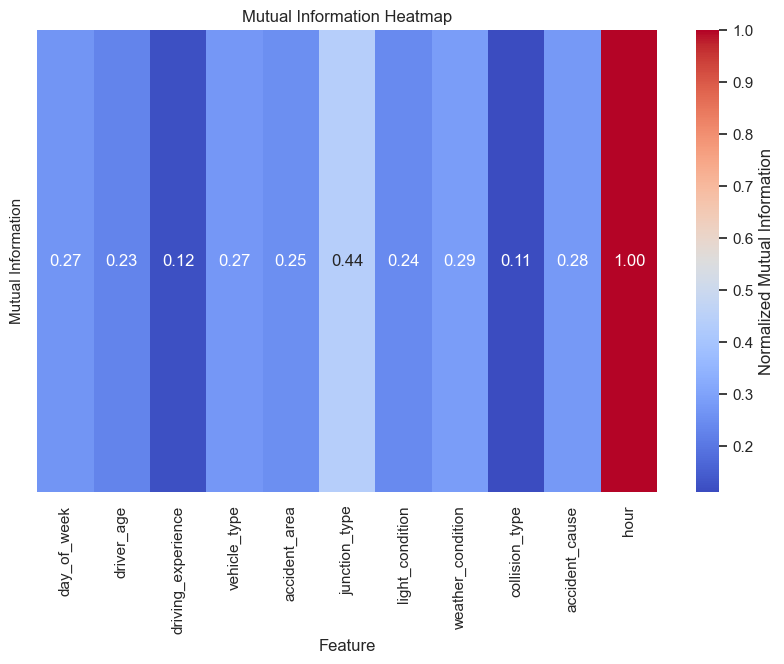

In [316]:
#Visualize the MI
plt.figure(figsize=(20,10))
# Prepare DataFrame for visualization
mi_df = pd.DataFrame({
    'Feature': imputed_df.drop(columns=[target,'minute',*numerical_columns]).columns,
    'Mutual Information': mi_scaled
})

# Filter out low MI features
mi_df = mi_df[mi_df['Mutual Information'] > 0.1]

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    mi_df.set_index('Feature').T,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar_kws={'label': 'Normalized Mutual Information'}
)
plt.title("Mutual Information Heatmap")
plt.show()


In [317]:
# from sklearn.manifold import TSNE
# X =imputed_df.drop(columns=['accident_severity'])
# labels = imputed_df['accident_severity']

# # Apply t-SNE
# tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
# X_tsne = tsne.fit_transform(X)

# # Visualize
# plt.figure(figsize=(15, 15))
# scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', s=50)
# plt.title("t-SNE Visualization", fontsize=14)
# plt.xlabel("t-SNE Dimension 1", fontsize=12)
# plt.ylabel("t-SNE Dimension 2", fontsize=12)
# # plt.legend()
# plt.colorbar(scatter, label="Target Label")
# plt.show()



<a id='insight'></a>
# Insights and Recommendations
⬆️ [Tabel of Contents](#contents_tabel)